In [1]:
# 0.필요모듈 import
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# 1. 데이터셋 로드 (csv -> dataframe)
# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
# pd.options.display.float_format = '{:,.2f}'.format

user = pd.read_csv('DataSet/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


In [3]:
# 2. 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean)/user_std  # 컬럼별 표준화 진행 

In [4]:
# 3. Scree plot analysis : 각 주성분이 전체 데이터에 대해 갖는 설명력 비율을 시각화
pca = PCA(n_components = 6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.043476,0.646301,-0.249843,0.704499,-0.066913,0.376684
1,1.926976,0.528713,0.431355,1.255031,0.085687,0.642017
2,-1.501383,-0.117994,0.800846,0.379732,-0.367393,-0.553751
3,1.168100,-1.373146,0.668054,-0.608071,0.036437,-0.285106
4,0.226542,-0.077045,-1.553274,-1.107927,-0.463466,-0.381861


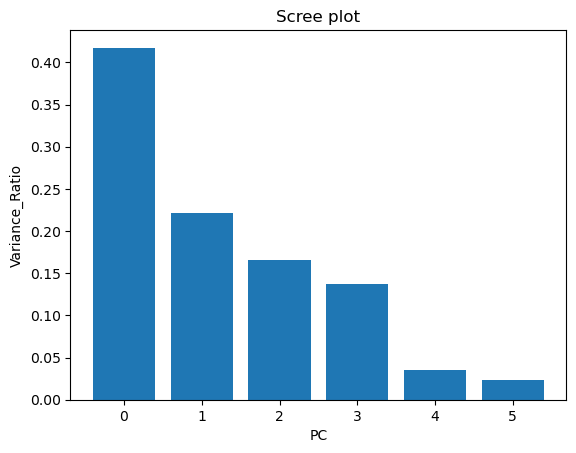

In [5]:
# PCA 개수
# explained variance ratio 가 클수록 설명력이 좋음
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

In [6]:
# 누적 분산이 일정 이상인지 확인
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000
